<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Heart Disease Prediction</h1>

<a id='table_of_contents'></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
2. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
3. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>
4. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
5. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
6. <a href="#model_building" style="text-decoration: None">Model Building</a>

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [1]:
import numpy as np
import pandas as pd
 
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data.csv")

data source: https://archive.ics.uci.edu/static/public/45/data.csv

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.30,3,0.00,6.00,0
1,67,1,4,160,286,0,2,108,1,1.50,2,3.00,3.00,2
2,67,1,4,120,229,0,2,129,1,2.60,2,2.00,7.00,1
3,37,1,3,130,250,0,0,187,0,3.50,3,0.00,3.00,0
4,41,0,2,130,204,0,2,172,0,1.40,1,0.00,3.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,299.00,301.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67,4.73,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.94,1.94,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,4.00


<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Map Data into Binary Class (Positive and Negative)</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [6]:
mapping = {0:0, 1:1, 2:1, 3:1, 4:1}

data['num'] = data['num'].map(mapping)
data['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.2. Drop NaN Rows</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [7]:
data = data.dropna()

<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style("darkgrid")

In [9]:
!pip install kaleido

In [10]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

`Heart Disease Class`

In [11]:
class_count = data['num'].value_counts()
class_count

0    160
1    137
Name: num, dtype: int64

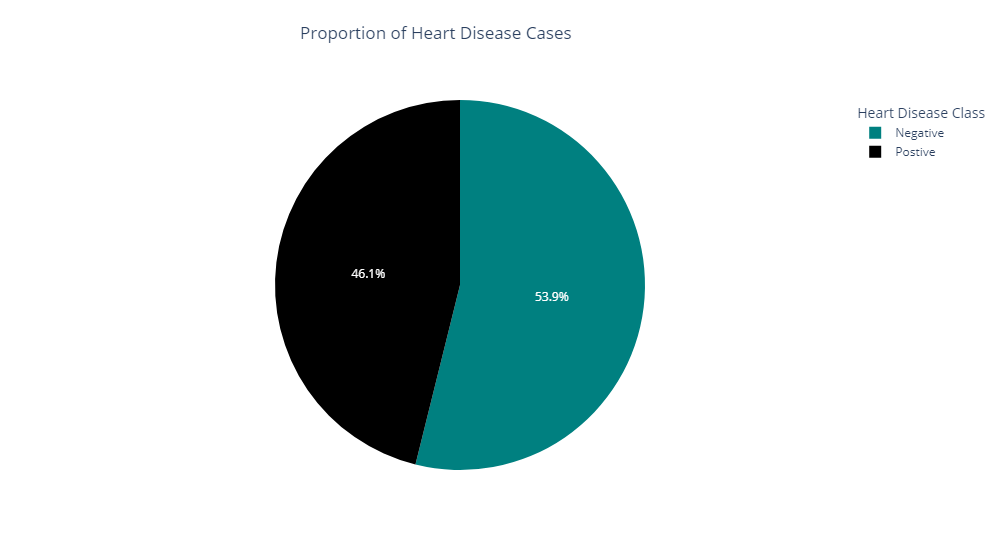

In [12]:
fig = px.pie(
    class_count, values=class_count.values,  names=['Negative', 'Postive'],
    title='Proportion of Heart Disease Cases',
    color_discrete_sequence=plot_color,
)

fig.update_layout(legend_title_text='Heart Disease Class', title_x=0.3, title_y=0.95,)
fig.show('png', width=1000, height=550)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

`Age and Health Disease Status`

In [13]:
# Filter data for health disease and no-health disease cases
no_disease_data = data[data['num'] == 0]
disease_data = data[data['num'] == 1]

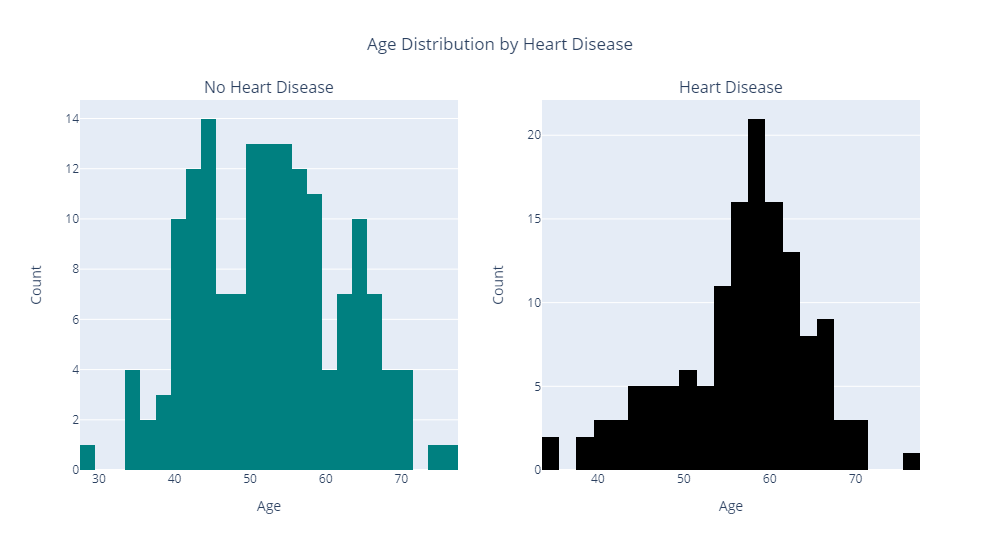

In [14]:
# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['No Heart Disease', 'Heart Disease'])

# Add histograms to subplots
histogram_no_disease = px.histogram(no_disease_data, 
                               x='age', 
                               color_discrete_sequence=['#008080'])
histogram_disease = px.histogram(disease_data, 
                            x='age',
                            color_discrete_sequence=['black'])

fig.add_trace(histogram_no_disease['data'][0], row=1, col=1)
fig.add_trace(histogram_disease['data'][0], row=1, col=2)

# Update layout
fig.update_layout(title="Age Distribution by Heart Disease", title_x=0.5)
fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text='Count')

fig.show('png', width=1000, height=550)

Majority of positive heart disease cases occur majorly in adults around the ages of 55 to 65. 

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [15]:
X_train = data.drop(columns=['num'])
y_train = data['num']

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Scale Numeric Columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config

In [17]:
scaler = MinMaxScaler()

In [18]:
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

In [19]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Split Data into Training and Test Set</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Shape of training set: {X_train.shape}')
print(f'Shape of validation set: {X_test.shape}')

Shape of training set: (237, 13)
Shape of validation set: (60, 13)


<a id="model_building"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Model Building</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="model_building"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.1. Define Model Evaluation Metrics</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [22]:
confusion_matrices = {}

In [23]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return confusion_mat, accuracy, precision, recall, f1

In [24]:
def metric_df(model, model_name):
    confusion_mat, *df = evaluate_model(model, X_train, y_train, X_test, y_test)
    confusion_matrices[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data=df, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    model_metrics.insert(0, 'Model', model_name)
    return model_metrics

<a id="model_building"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.2. Train and Evaluate Classification Models</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [25]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [26]:
models = [
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
]

In [27]:
predictions = []

for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [28]:
predictions_base = pd.concat(predictions, ignore_index=True, sort=False)
predictions_base = predictions_base.sort_values(by=['Recall'], ascending=False).style

predictions_base

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.900000,0.846154,0.916667,0.880000
1,Random Forest,0.883333,0.840000,0.875000,0.857143


<a id="confusion_models"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6.3. Plot Confusion Matrics Models</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [29]:
models_to_plot = [
    'Logistic Regression',
    'Random Forest'
]

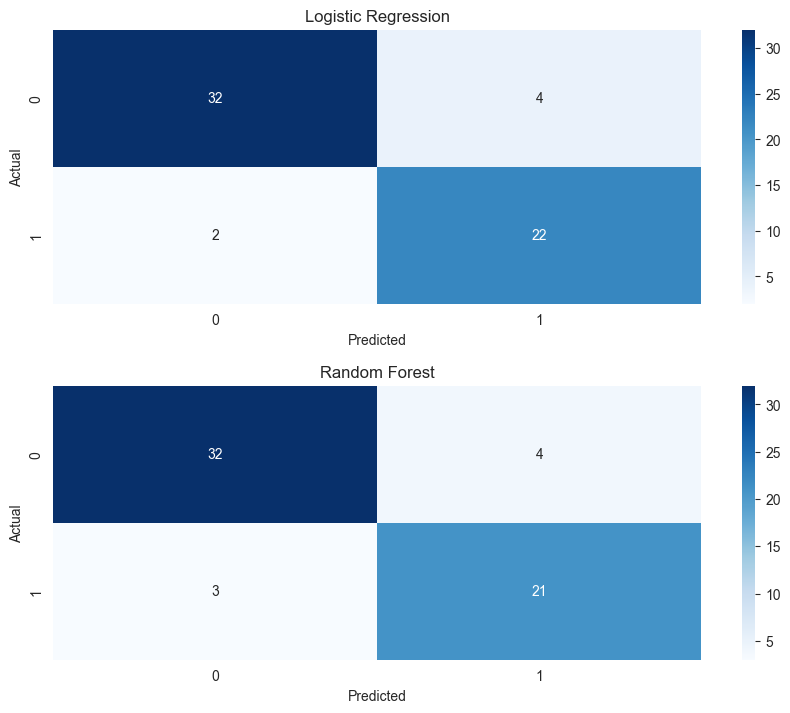

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7))

# Loop through models and plot confusion matrices
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_matrices[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(left=0, right=0.9, top=0.9, bottom=0)
plt.show()